# Time-lapse

The plugin is designed to work not just with single images but also with stacks of images, in particular time-lapses. Here's an example with a fluorescence microscopy time-lapse of a cell (see below for more details):

<video width="620" controls 
        src=../images/convpaint_timelapse.webm 
        type=video/webm> 
</video>

## Step by step

Here we explain the process step by step. First, we need to import the image. This can be done in the usual way (menu, drag and drop etc.). What is important is that the dimensions (which can be time, z, channel) needs to be three dimensional, the third dimension being accessible via the slider.

In [29]:
import napari
from napari_convpaint.conv_paint import ConvPaintWidget
from napari.utils import nbscreenshot
import matplotlib.pyplot as plt

In [30]:
viewer = napari.Viewer()
self = ConvPaintWidget(viewer)
viewer.window.add_dock_widget(self);

In [31]:
import skimage
im = skimage.io.imread('../../../Projects_data/napari-morphodynamics/exp051_fov000_small.tiff/')
viewer.add_image(im[0,0:10]);
viewer.layers[0].contrast_limits = [-10.0, 452.57342657342656]

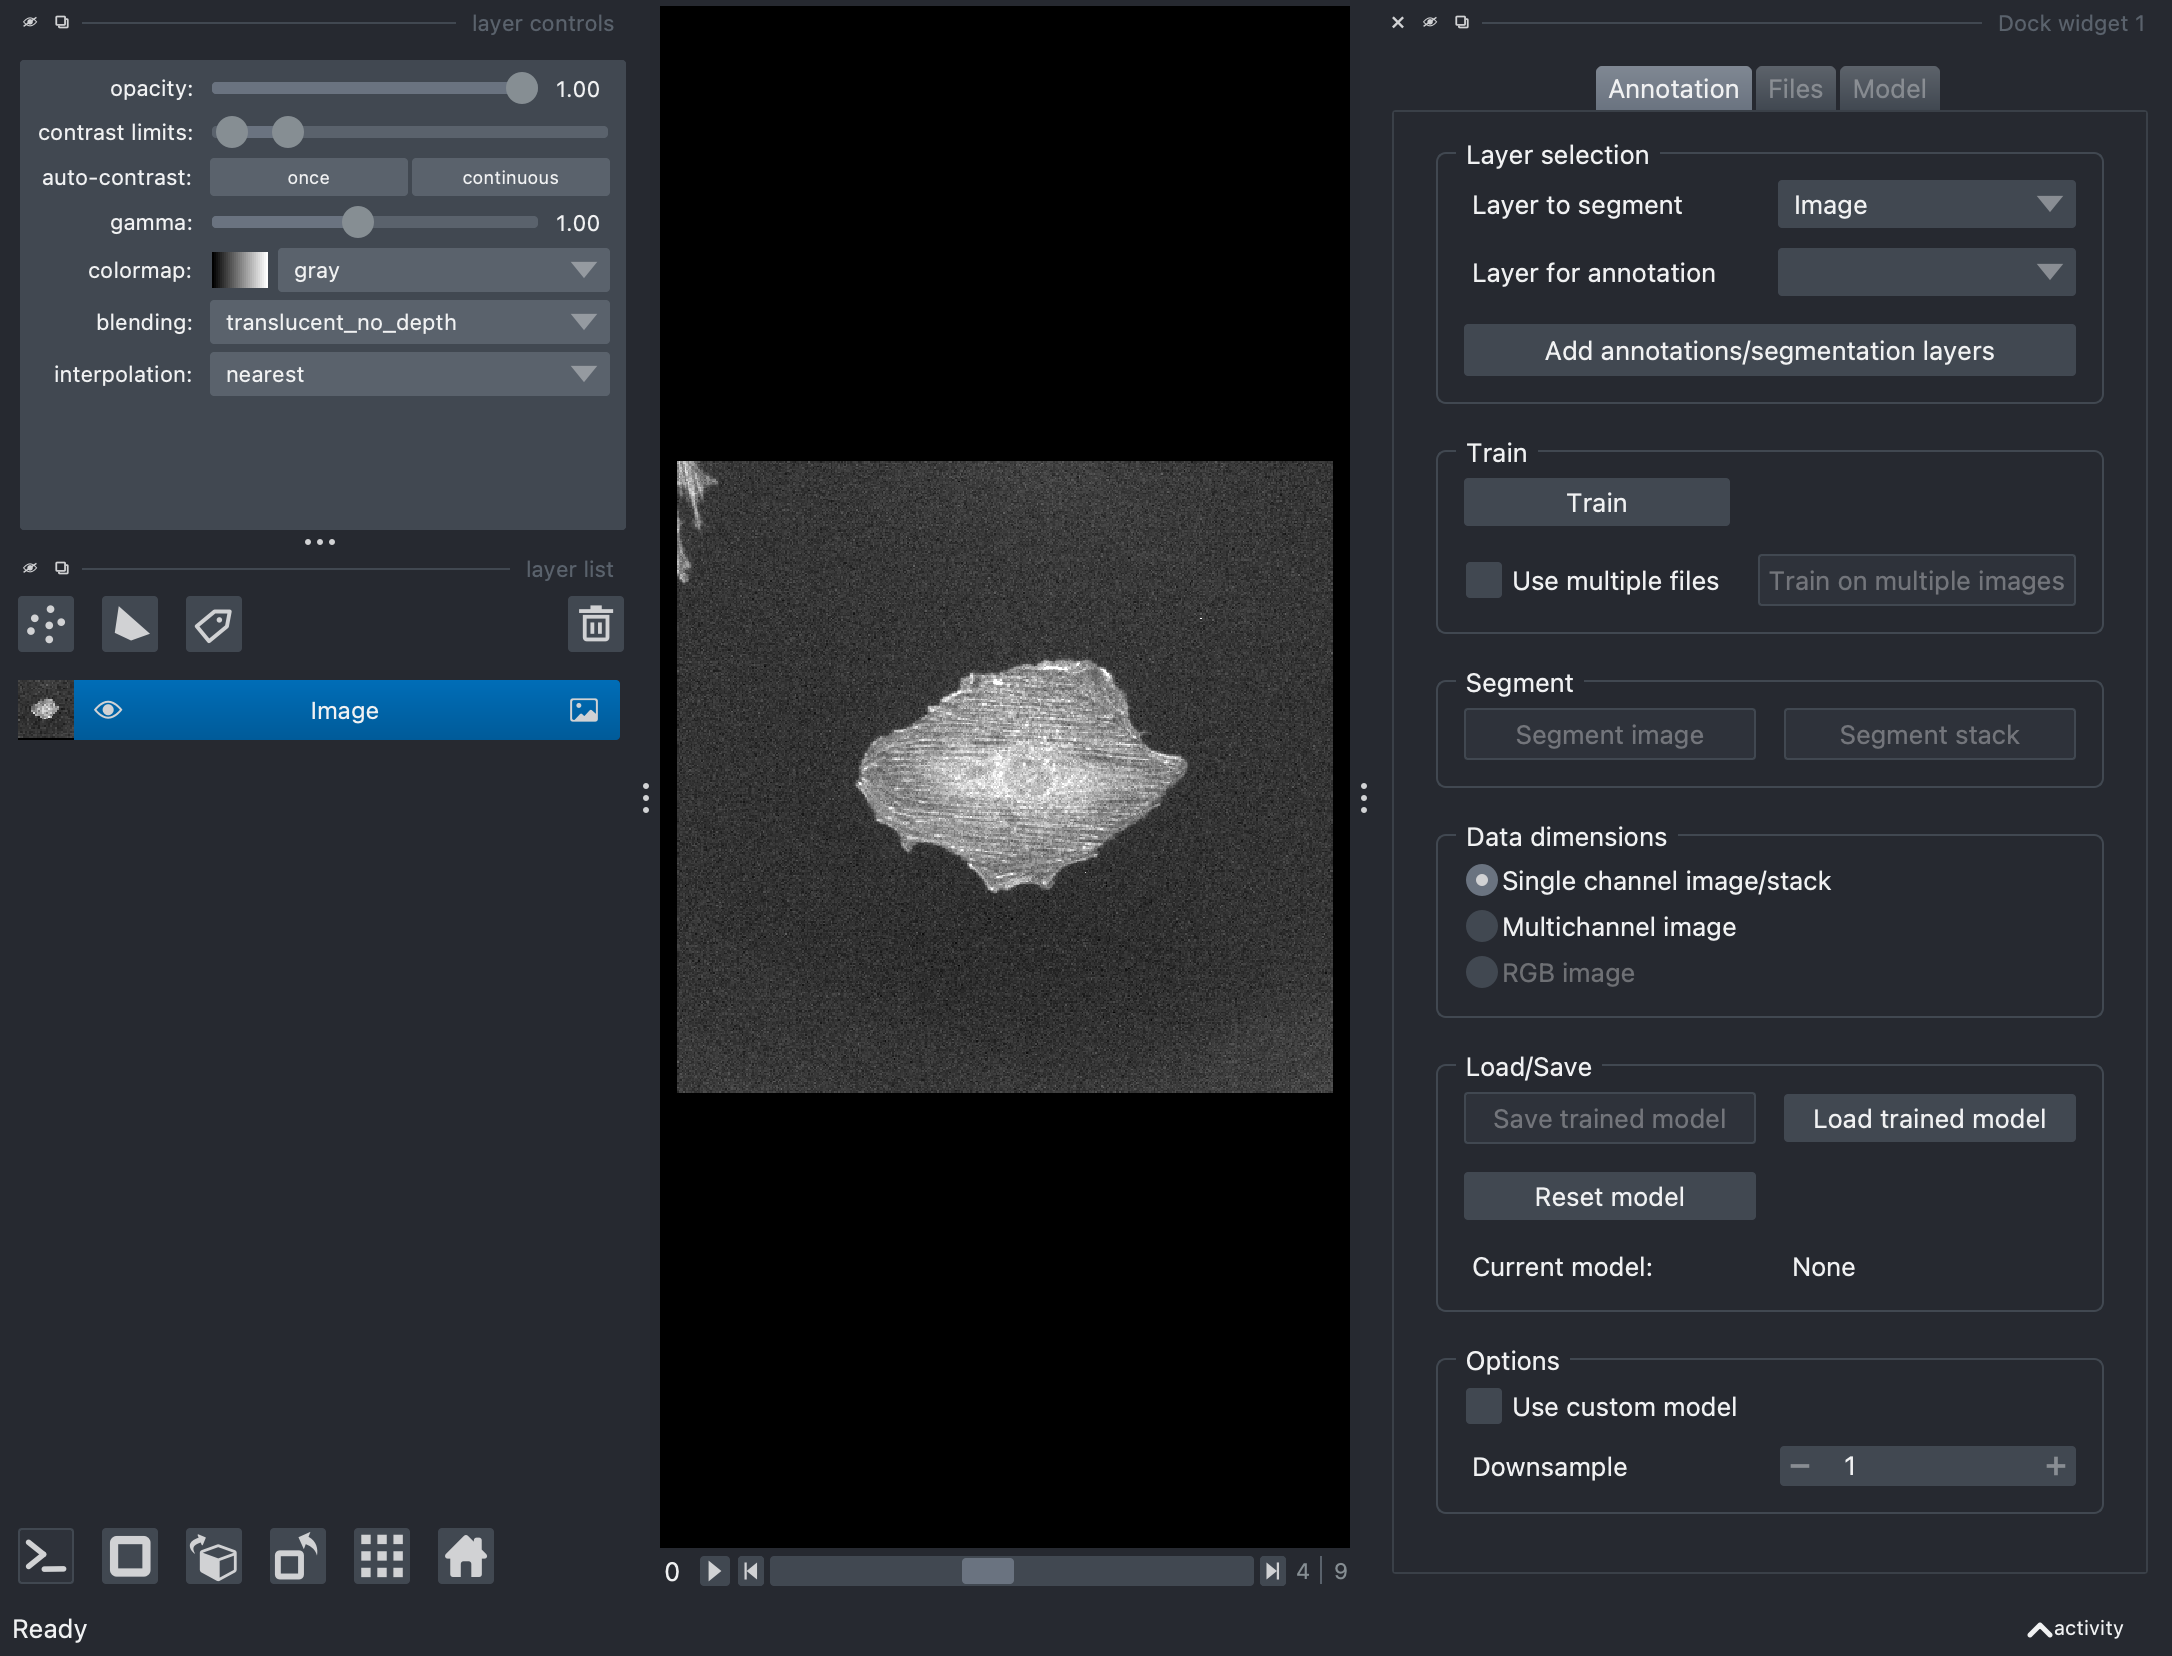

In [23]:
nbscreenshot(viewer)

Now we can annotate one or more images in the stack. By default, when adding annotations/predictions layers, they will have the same dimensions as the currently opened dataset:

In [24]:
im1 = viewer.screenshot(canvas_only=False)

In [25]:
im2 = viewer.screenshot(canvas_only=False)

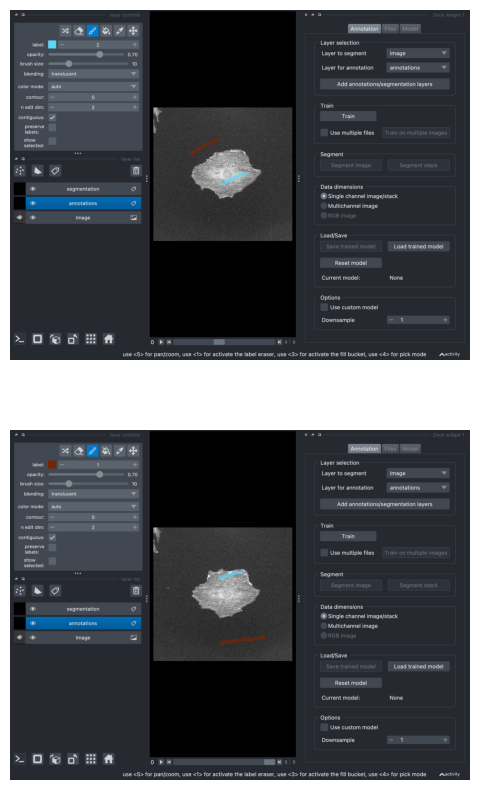

In [26]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].imshow(im1)
ax[1].imshow(im2);
ax[0].set_axis_off()
ax[1].set_axis_off()

If we now run click on ```Train```, *all annotations* will be taken into account. Once training is done, we can verify the quality of the segmentation on a single frame, pressing ```Segment image```.

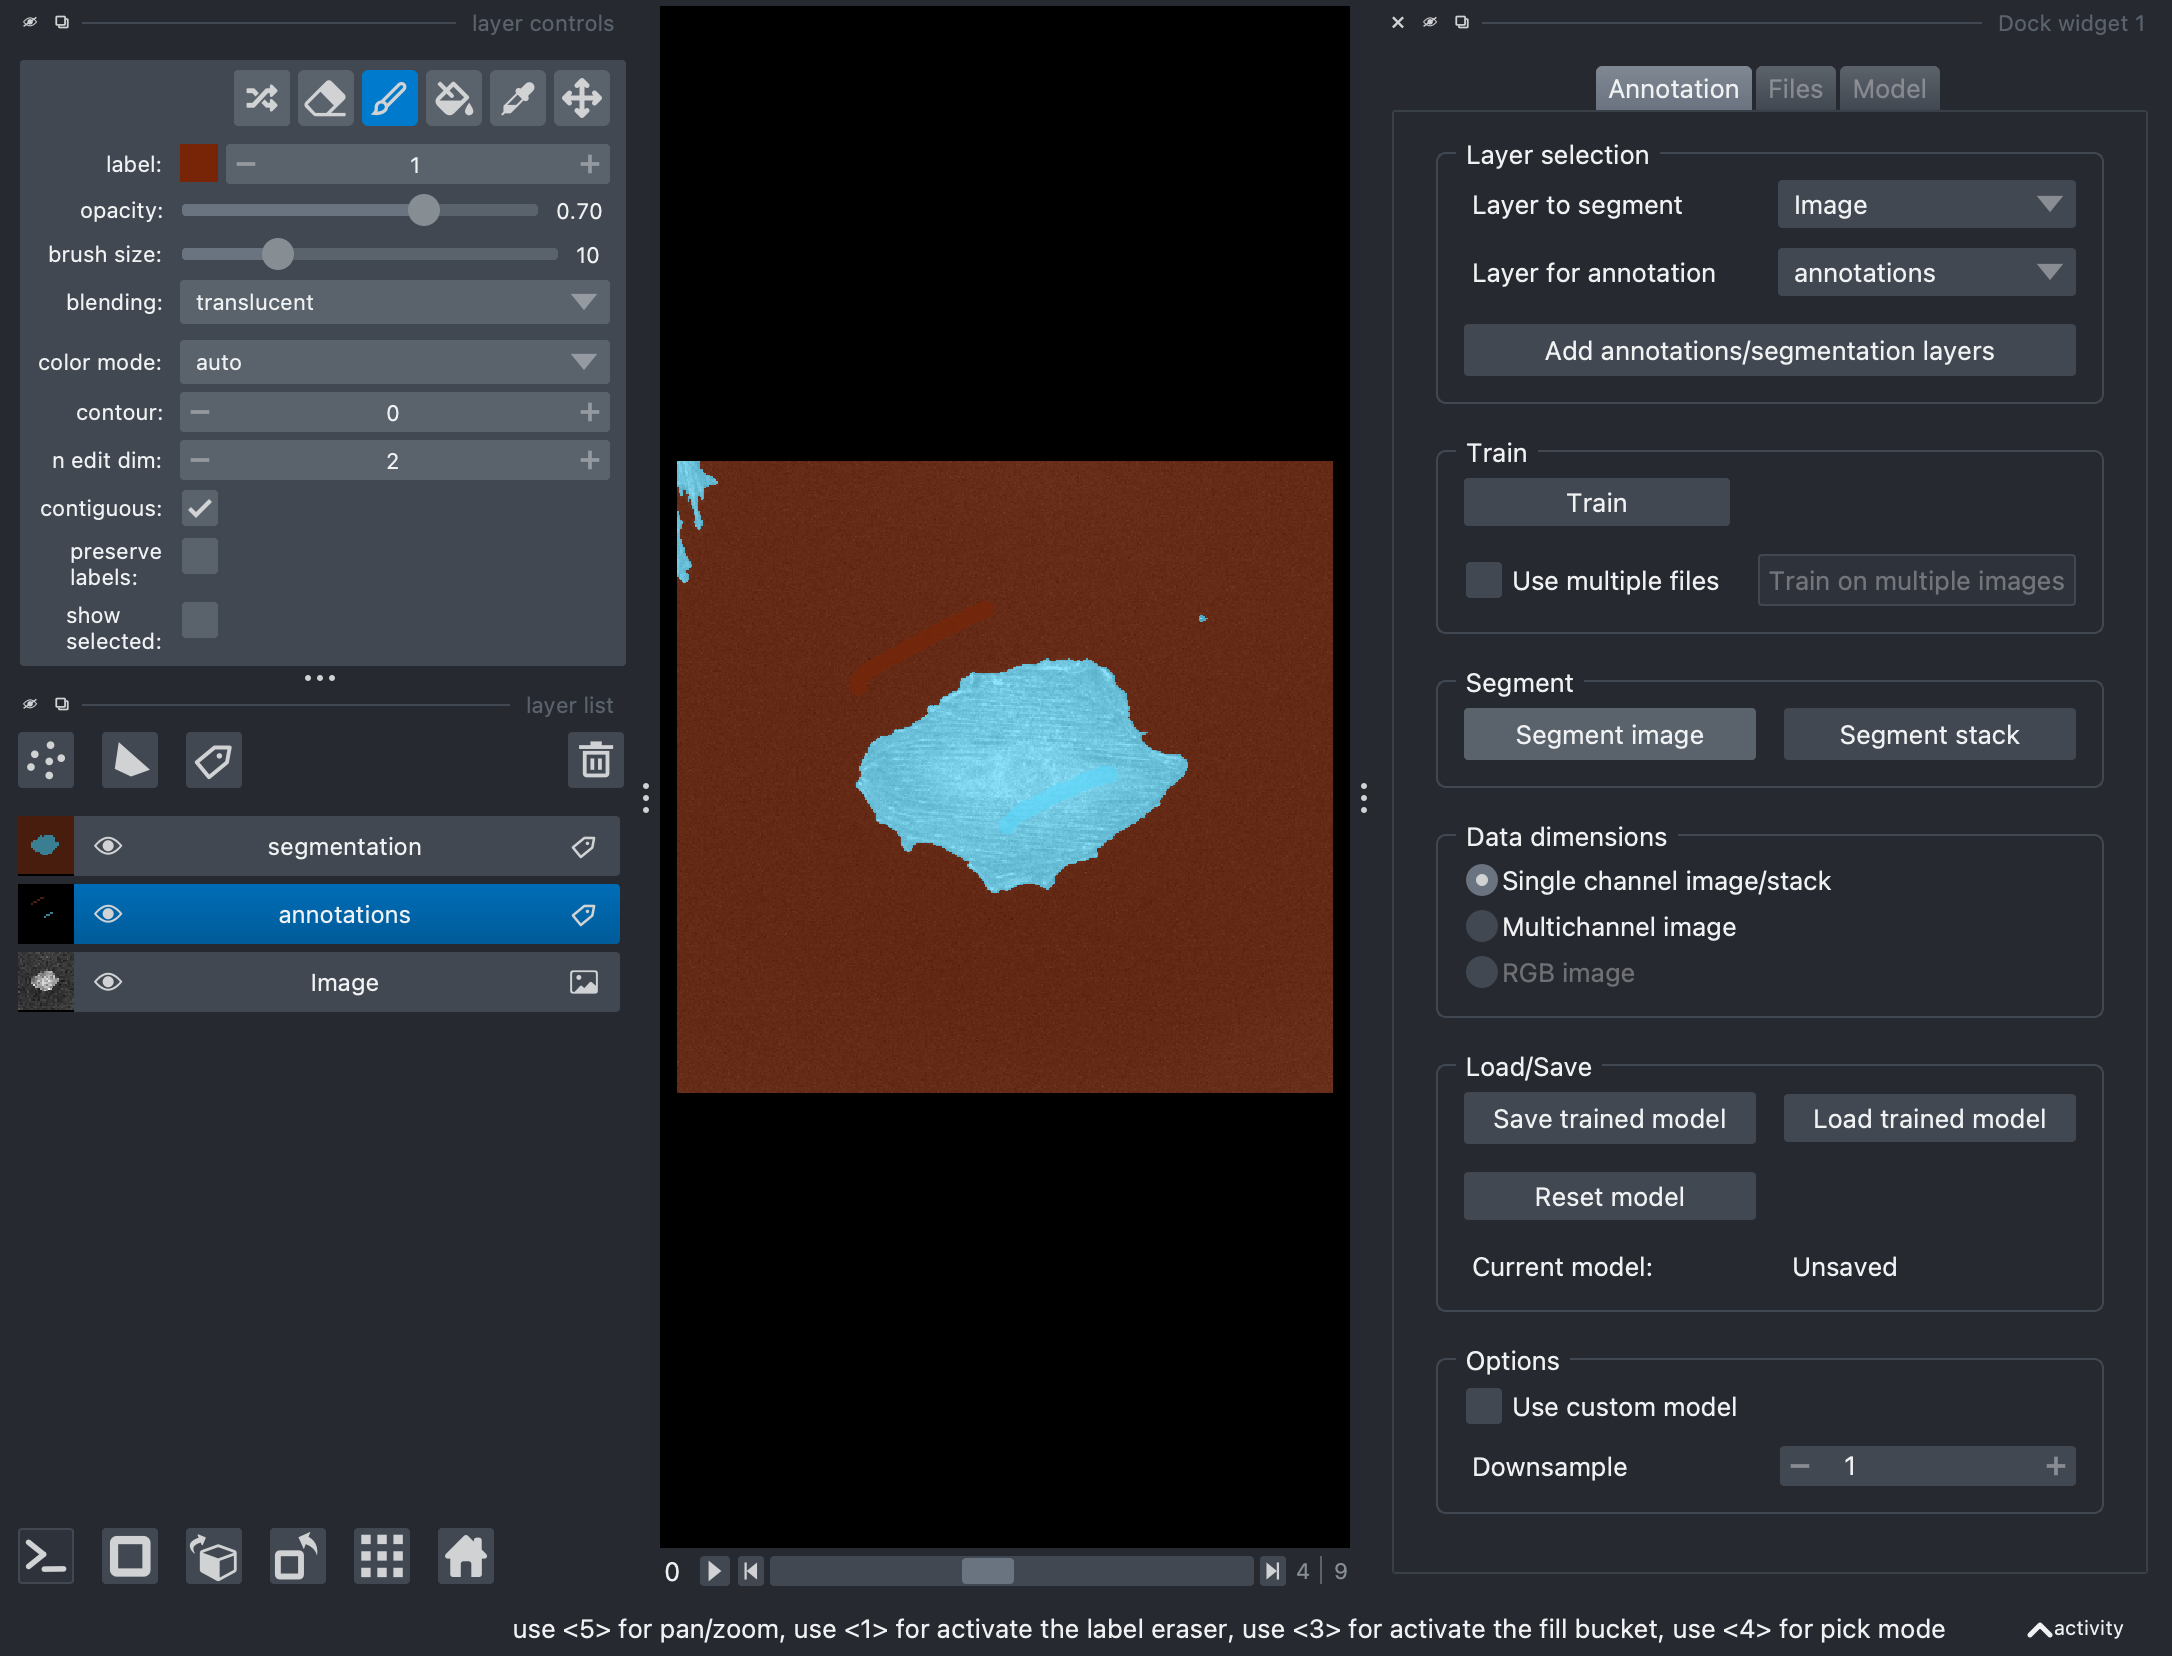

In [27]:
nbscreenshot(viewer)

If we are satisfied we can run ```Segment stack``` to get the full segmentation:

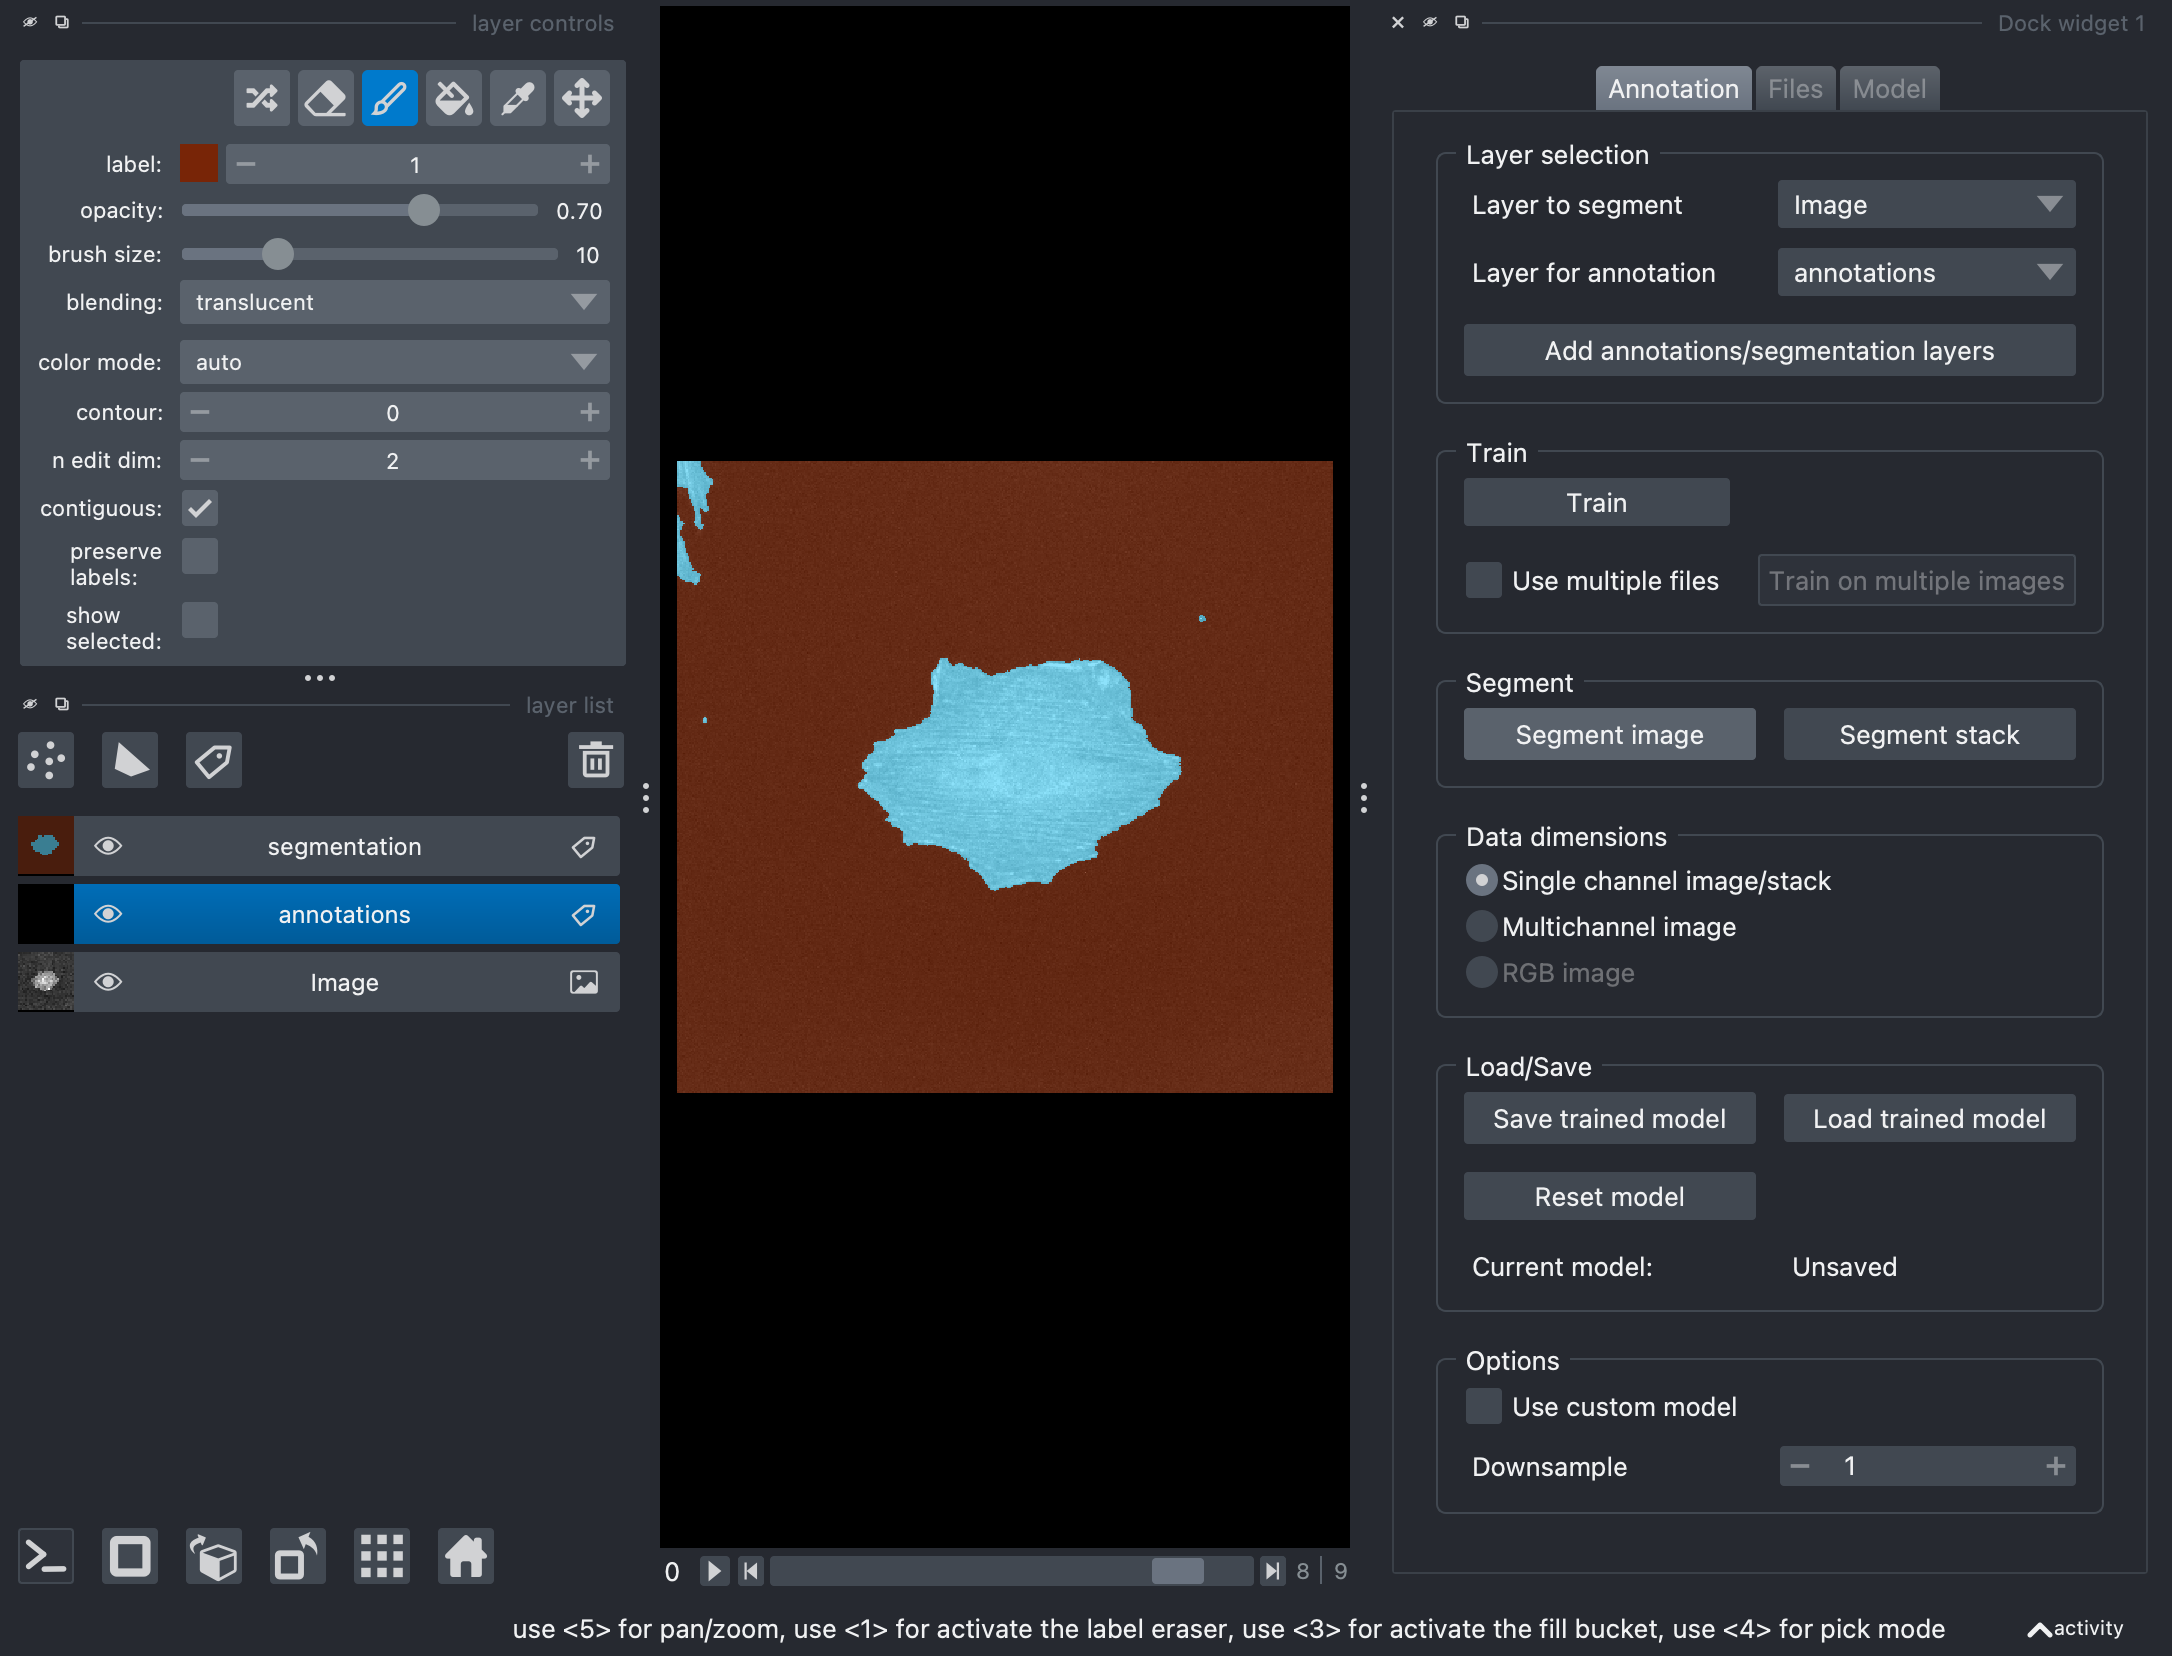

In [28]:
nbscreenshot(viewer)

## Ignoring dimensions

Note that in certain cases, the additional dimension doesn't represent time or Z but channels. In such as case, annotations should be done only in a single plane and corresponding features be extracted from **all** channels. This can be achieved by selecting the option ```Multichannel image``` in the ```Data dimensions``` box.